In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


In [19]:
#  LOADING THE DATASET FOR ANALYSIS
df = pd.read_csv("archive/zomato.csv",encoding='latin-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [20]:
# EXPLORING THE DATA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [21]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [22]:
df.shape

(9551, 21)

In [23]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [24]:
# CLEANING THE DATA
df.dropna(subset=['Cuisines'],inplace = True)

In [25]:
# Simplify column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [26]:
df.columns

Index(['restaurant_id', 'restaurant_name', 'country_code', 'city', 'address',
       'locality', 'locality_verbose', 'longitude', 'latitude', 'cuisines',
       'average_cost_for_two', 'currency', 'has_table_booking',
       'has_online_delivery', 'is_delivering_now', 'switch_to_order_menu',
       'price_range', 'aggregate_rating', 'rating_color', 'rating_text',
       'votes'],
      dtype='object')

1) Top 10 Cities with Most Restaurants


In [27]:
top_cities = df['city'].value_counts().head(10)

In [28]:
top_cities

city
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Ahmedabad         21
Guwahati          21
Amritsar          21
Bhubaneshwar      21
Lucknow           21
Name: count, dtype: int64

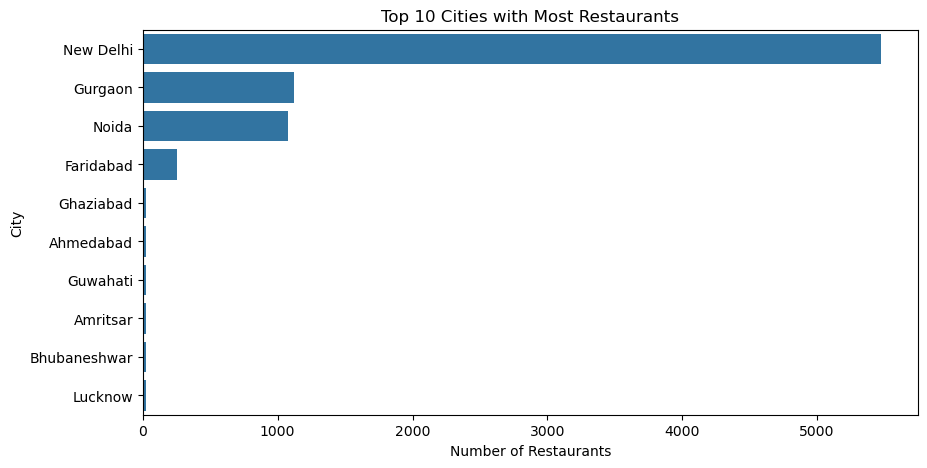

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title("Top 10 Cities with Most Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("City")
plt.show()

## 2. Most Popular Cuisines

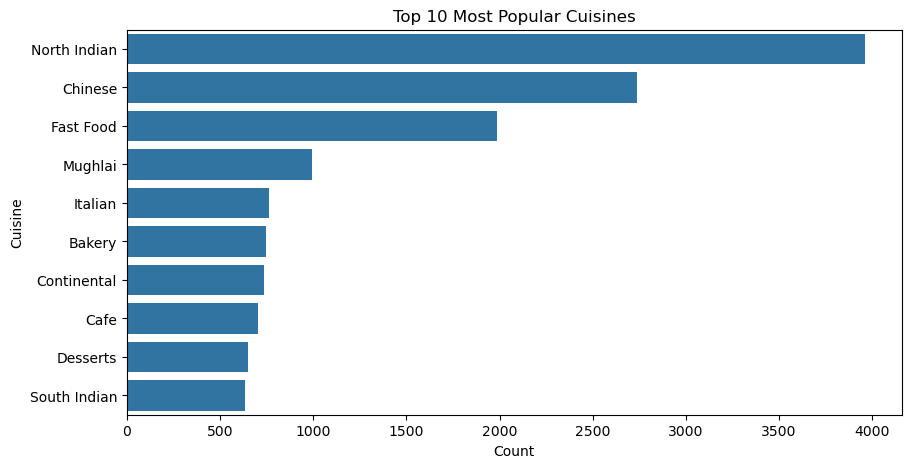

In [31]:
cuisines_split = df['cuisines'].apply(lambda x: x.split(','))
flat_list = [item.strip() for sublist in cuisines_split for item in sublist]
top_cuisines = pd.Series(Counter(flat_list)).sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index)
plt.title("Top 10 Most Popular Cuisines")
plt.xlabel("Count")
plt.ylabel("Cuisine")
plt.show()


## 3. Cost vs Rating

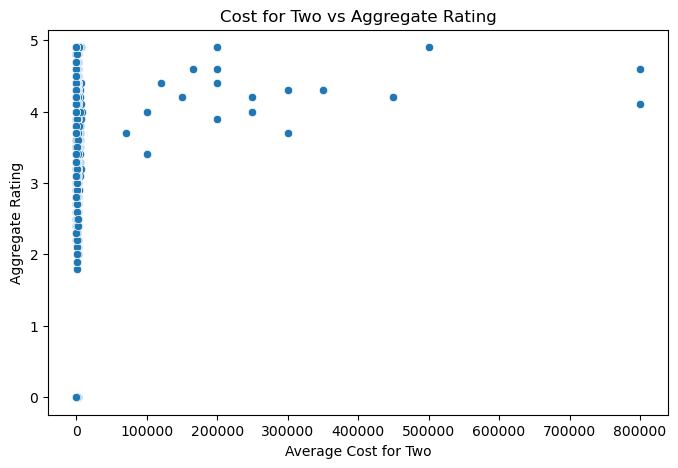

In [32]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='average_cost_for_two', y='aggregate_rating')
plt.title("Cost for Two vs Aggregate Rating")
plt.xlabel("Average Cost for Two")
plt.ylabel("Aggregate Rating")
plt.show()


## 4.Online Delivery vs Rating

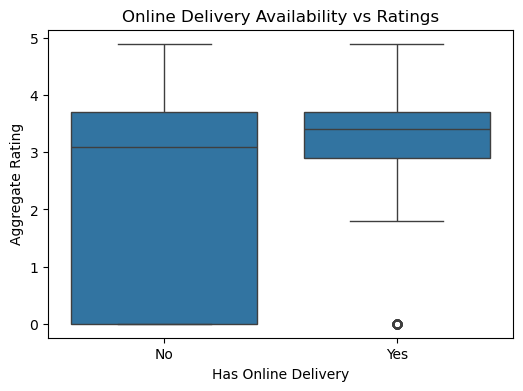

In [33]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='has_online_delivery', y='aggregate_rating')
plt.title("Online Delivery Availability vs Ratings")
plt.xlabel("Has Online Delivery")
plt.ylabel("Aggregate Rating")
plt.show()


## 5. Table Booking vs Rating

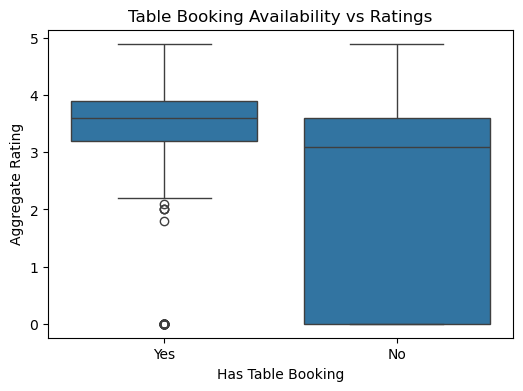

In [34]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='has_table_booking', y='aggregate_rating')
plt.title("Table Booking Availability vs Ratings")
plt.xlabel("Has Table Booking")
plt.ylabel("Aggregate Rating")
plt.show()


## 6.Votes vs Ratings

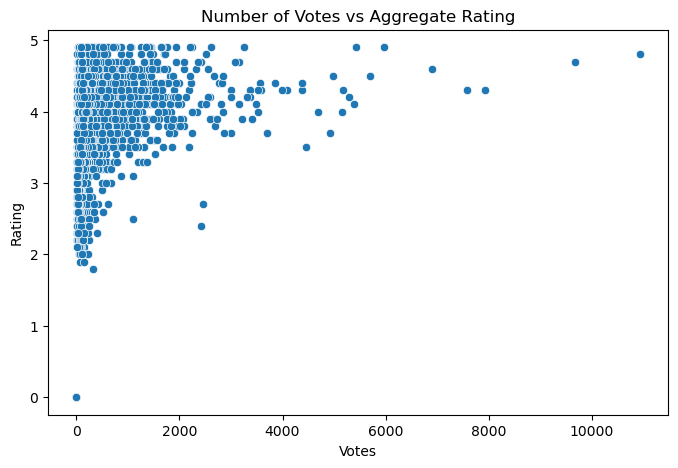

In [35]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='votes', y='aggregate_rating')
plt.title("Number of Votes vs Aggregate Rating")
plt.xlabel("Votes")
plt.ylabel("Rating")
plt.show()


## Insights:
- Bangalore and Delhi NCR have the highest number of restaurants.
- North Indian and Chinese are the most popular cuisines.
- Online delivery availability is slightly associated with better ratings.
- More votes usually result in better aggregate ratings.
- Cost does not guarantee higher ratings.
